In [1]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
with zipfile.ZipFile('vgsales.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()


In [3]:
os.listdir()

['vgsales.csv.zip',
 'vendas_globais-por_regiao.png',
 '.ipynb_checkpoints',
 'Untitled Folder 1',
 'notebook.ipynb',
 'Untitled.ipynb',
 'Untitled Folder',
 'vendas_por_genero.png',
 'evolucao_das_vendas_ao_longo_do_tempo.png',
 'vgsales.csv']

In [6]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
#Limpeza básica dos dados
df = df.dropna(subset=['Year', 'Genre', 'Global_Sales'])
df['Year'] = df['Year'].astype(int)

df.isna().sum()


Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [9]:
#vendas globais por gênero
sales_by_genre = (
    df.groupby('Genre')['Global_Sales']
    .sum()
    .sort_values(ascending=False)
)

sales_by_genre


Genre
Action          1722.88
Sports          1309.24
Shooter         1026.20
Role-Playing     923.84
Platform         829.15
Misc             797.62
Racing           726.77
Fighting         444.05
Simulation       390.16
Puzzle           242.22
Adventure        234.80
Strategy         173.43
Name: Global_Sales, dtype: float64

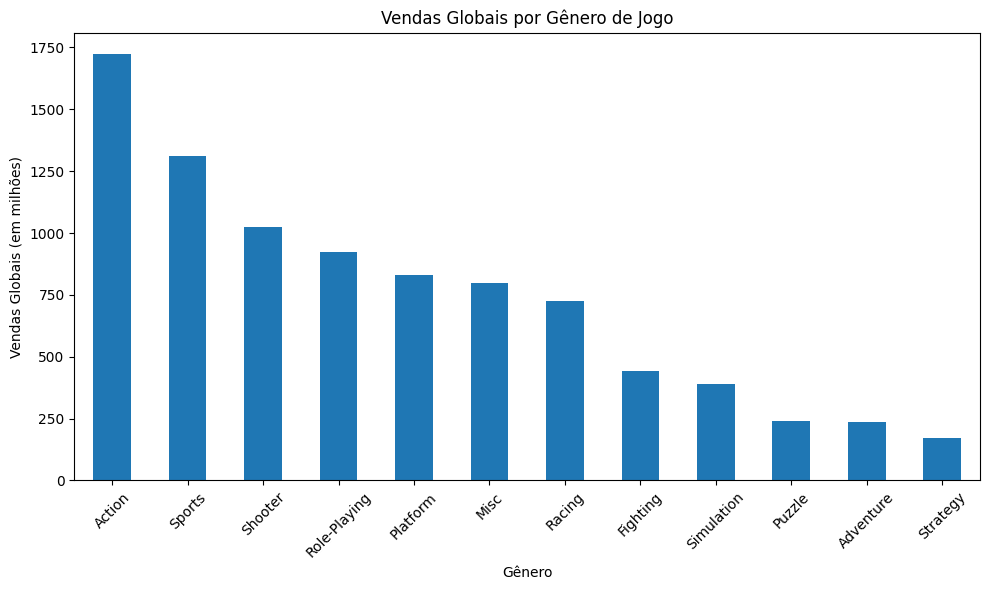

In [10]:
#gráfico - das vendas globais por gênero
plt.figure(figsize=(10, 6))
sales_by_genre.plot(kind='bar')
plt.title('Vendas Globais por Gênero de Jogo')
plt.xlabel('Gênero')
plt.ylabel('Vendas Globais (em milhões)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('vendas_por_genero.png', dpi=300)
plt.show()


In [12]:
#Evolução das vendas globais ao longo do tempo
sales_by_year = (
    df.groupby('Year')['Global_Sales']
    .sum()
)

sales_by_year.head()


Year
1980    11.38
1981    35.77
1982    28.86
1983    16.79
1984    50.36
Name: Global_Sales, dtype: float64

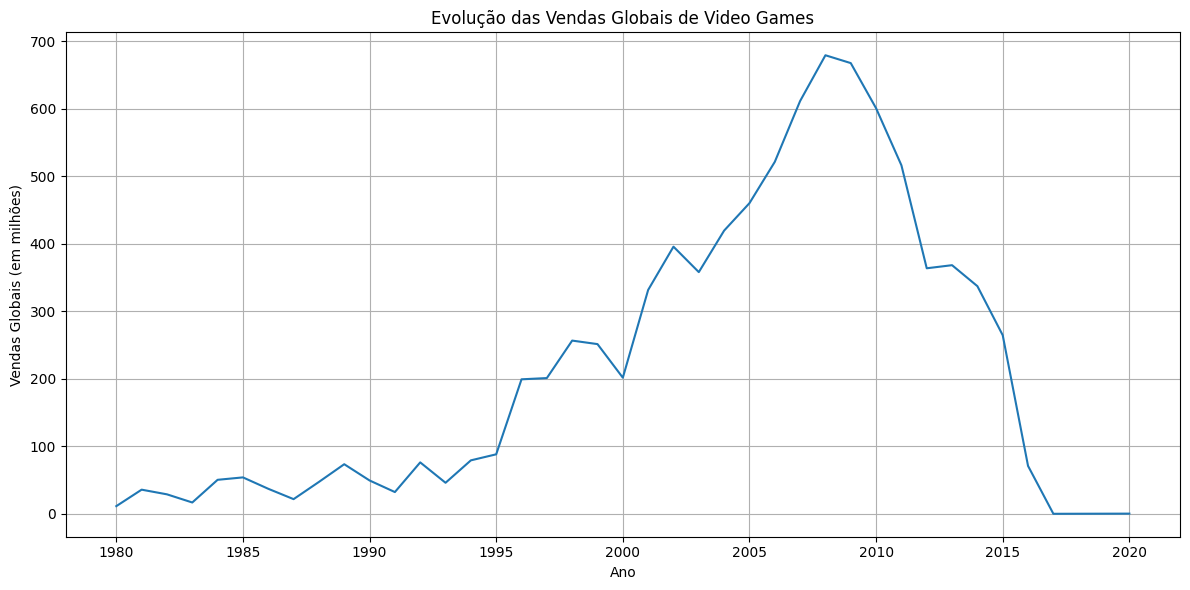

In [13]:
#Gráfico – Evolução das vendas globais
plt.figure(figsize=(12, 6))
sales_by_year.plot()
plt.title('Evolução das Vendas Globais de Video Games')
plt.xlabel('Ano')
plt.ylabel('Vendas Globais (em milhões)')
plt.grid(True)
plt.tight_layout()
plt.savefig('evolucao_vendas_globais.png', dpi=300)
plt.show()


In [15]:
#Vendas globais por região
regional_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
regional_sales


NA_Sales       4333.43
EU_Sales       2409.12
JP_Sales       1284.30
Other_Sales     789.01
dtype: float64

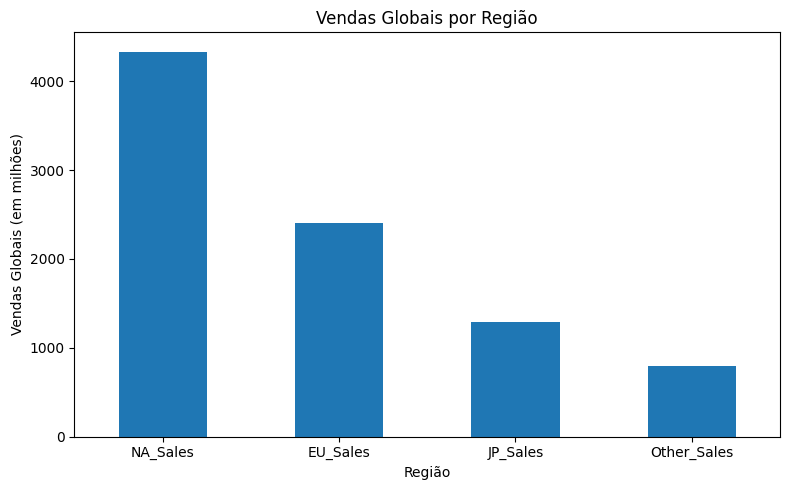

In [16]:
#Gráfico - Vendas globais por região
plt.figure(figsize=(8, 5))
regional_sales.plot(kind='bar')
plt.title('Vendas Globais por Região')
plt.xlabel('Região')
plt.ylabel('Vendas Globais (em milhões)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('vendas_por_regiao.png', dpi=300)
plt.show()
